In [1]:
# Importing necessary packages 

import pandas as pd
import numpy as np
import os
import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
# Read the 2015, 2016, 2017, 2018, and 2019 happiness datasets and store it in a DataFrame named happiness_2015,happiness_2016, happiness_2017, happiness_2018, and happiness_2019 respectively. 
happiness_2015 = pd.read_csv(r"C:\Users\Personal\Documents\personal\Projects\Happiness model\Happiness\Dataset\2015.csv")
happiness_2016 = pd.read_csv(r"C:\Users\Personal\Documents\personal\Projects\Happiness model\Happiness\Dataset\2016.csv")
happiness_2017 = pd.read_csv(r"C:\Users\Personal\Documents\personal\Projects\Happiness model\Happiness\Dataset\2017.csv")
happiness_2018 = pd.read_csv(r"C:\Users\Personal\Documents\personal\Projects\Happiness model\Happiness\Dataset\2018.csv")
happiness_2019 = pd.read_csv(r"C:\Users\Personal\Documents\personal\Projects\Happiness model\Happiness\Dataset\2019.csv")

In [3]:
# Select relevant columns from the 2015-2017 datasets

happiness_2015 = happiness_2015[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
                       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 
                       'Dystopia Residual']]
happiness_2016 = happiness_2016[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
                       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 
                       'Dystopia Residual']]
happiness_2017 = happiness_2017[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
                       'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 
                       'Dystopia.Residual']]

In [4]:
# Edit header names to standardize them

new_headers_2015_2017 = ['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
                       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 
                       'Dystopia Residual']

In [5]:
# Format header names with the newly edited header names

happiness_2015.columns = new_headers_2015_2017
happiness_2016.columns = new_headers_2015_2017
happiness_2017.columns = new_headers_2015_2017

In [6]:
# Create a year column

happiness_2015['Year'] = 2015
happiness_2016['Year'] = 2016
happiness_2017['Year'] = 2017

In [7]:
# Merge the 2015, 2016 and 2017 datasets together 

happiness_data = pd.concat([happiness_2015, happiness_2016, happiness_2017], axis = 0)
happiness_data

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Switzerland,1,7.587,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2.517380,2015
1,Iceland,2,7.561,1.302320,1.402230,0.947840,0.628770,0.436300,0.141450,2.702010,2015
2,Denmark,3,7.527,1.325480,1.360580,0.874640,0.649380,0.341390,0.483570,2.492040,2015
3,Norway,4,7.522,1.459000,1.330950,0.885210,0.669730,0.346990,0.365030,2.465310,2015
4,Canada,5,7.427,1.326290,1.322610,0.905630,0.632970,0.458110,0.329570,2.451760,2015
...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,2017


In [8]:
# Add year column to the 2018 and 2019 datasets

happiness_2018['Year'] = 2018
happiness_2019['Year'] = 2019

In [9]:
happiness_data2 = pd.concat([happiness_2018, happiness_2019], axis=0)
happiness_data2

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019


In [10]:
# Standardize the column headers to make them uniform across the 2 different datasets that were merged seperately

columns_headers = ['Country', 'Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year']
happiness_data2 = happiness_data2.reindex(columns=columns_headers)

# Renaming the column headers in the first nmerged dataset inorder to make it uniform

old_happiness_1_data = happiness_data[['Country', 'Happiness Rank', 'Happiness Score','Economy (GDP per Capita)', 'Family', 
                 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Year']]
old_happiness_1_data.columns = ['Country', 'Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year']

# Finally, concatenating all data
happiness = pd.concat([old_happiness_1_data, happiness_data2], axis=0)

happiness.head(20)

,Country,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
5,Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.23351,0.41372,2015
6,Netherlands,7,7.378,1.32944,1.28017,0.89284,0.61576,0.47610,0.31814,2015
7,Sweden,8,7.364,1.33171,1.28907,0.91087,0.65980,0.36262,0.43844,2015
8,New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.47501,0.42922,2015
9,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.43562,0.35637,2015


In [11]:
missing_values = happiness.isnull().sum()
missing_values

Country                         312
Overall rank                      0
Score                             0
GDP per capita                    0
Social support                    0
Healthy life expectancy           0
Freedom to make life choices      0
Generosity                        0
Perceptions of corruption         1
Year                              0
dtype: int64

In [12]:
happiness[happiness['Perceptions of corruption'].isnull()]

,Country,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
19,NaN,20,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2018


In [13]:
happiness = happiness.dropna(subset=['Perceptions of corruption'])
happiness.shape

(781, 10)

In [14]:
happiness.describe(include = 'all')

,Country,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
count,470,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
unique,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,78.773367,5.377232,0.914537,1.078780,0.612342,0.411254,0.218618,0.125436,2016.992318
std,NaN,45.162398,1.127071,0.405403,0.329581,0.248459,0.152911,0.122394,0.105816,1.417814
min,NaN,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,NaN,40.000000,4.509000,0.605000,0.870210,0.440060,0.310480,0.130000,0.054000,2016.000000
50%,NaN,79.000000,5.321000,0.982000,1.125000,0.647239,0.431000,0.202000,0.091000,2017.000000
75%,NaN,118.000000,6.182000,1.233748,1.328000,0.808000,0.531000,0.279060,0.156030,2018.000000


In [15]:
# Define the data for the choropleth map

data = dict(
    type='choropleth',
    locations=happiness['Country'],
    locationmode='country names',
    z=happiness['Overall rank'],
    text=happiness['Country'],
    colorscale='Viridis',
    colorbar={'title': 'Happiness Rank'}
)

# Define the layout for the choropleth map
layout = dict(
    title='Happiness Rank Across the World',
    geo=dict(
        showframe=False,
        projection={'type': 'mercator'}
    )
)

# Define the layout for the choropleth map
layout = dict(
    title={
        'text': 'Happiness Rank Across the World',
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor point of the title
    },
    geo=dict(
        showframe=False,
        projection={'type': 'mercator'}
    )
)

# Create the figure with the data and layout
fig = go.Figure(data=[data], layout=layout)

# Plot the figure
iplot(fig)

In [16]:
# Create a trace
trace = go.Scatter(
    x=happiness['Score'],
    y=happiness['Overall rank'],
    mode='markers'
)

# Define the layout
layout = go.Layout(
    title={
        'text': 'Happiness Ranking Based on Scores',
        'x': 0.5,  # Center the title
        'xanchor': 'center'
    },
    xaxis=dict(title='Happiness Score'),
    yaxis=dict(title='Happiness Rank')
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Plot the figure
iplot(fig)


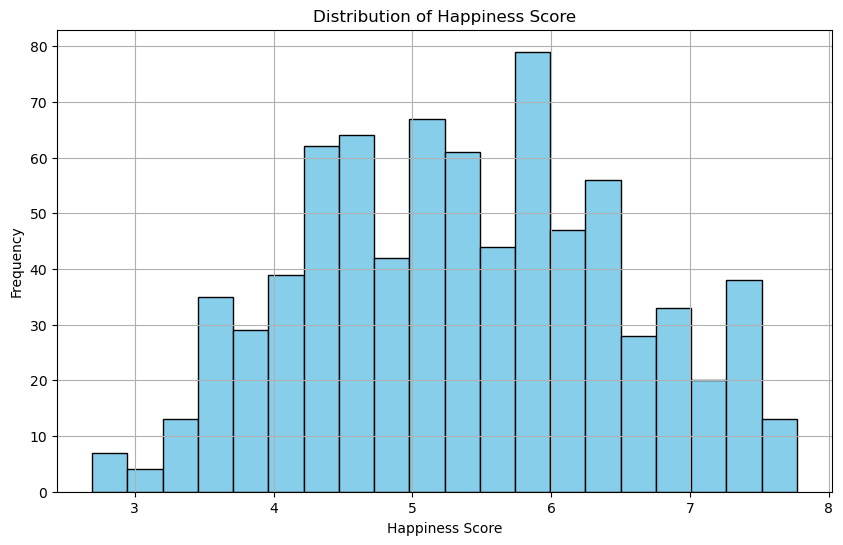

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(happiness['Score'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Correlation Coefficients:
                                 Score  GDP per capita  Social support  \
Score                         1.000000        0.789719        0.651246   
GDP per capita                0.789719        1.000000        0.592889   
Social support                0.651246        0.592889        1.000000   
Healthy life expectancy       0.742843        0.787752        0.573252   
Freedom to make life choices  0.553365        0.345615        0.419795   
Generosity                    0.138142       -0.013646       -0.037597   
Perceptions of corruption     0.398418        0.306307        0.126401   

                              Healthy life expectancy  \
Score                                        0.742843   
GDP per capita                               0.787752   
Social support                               0.573252   
Healthy life expectancy                      1.000000   
Freedom to make life choices                 0.341155   
Generosity                             

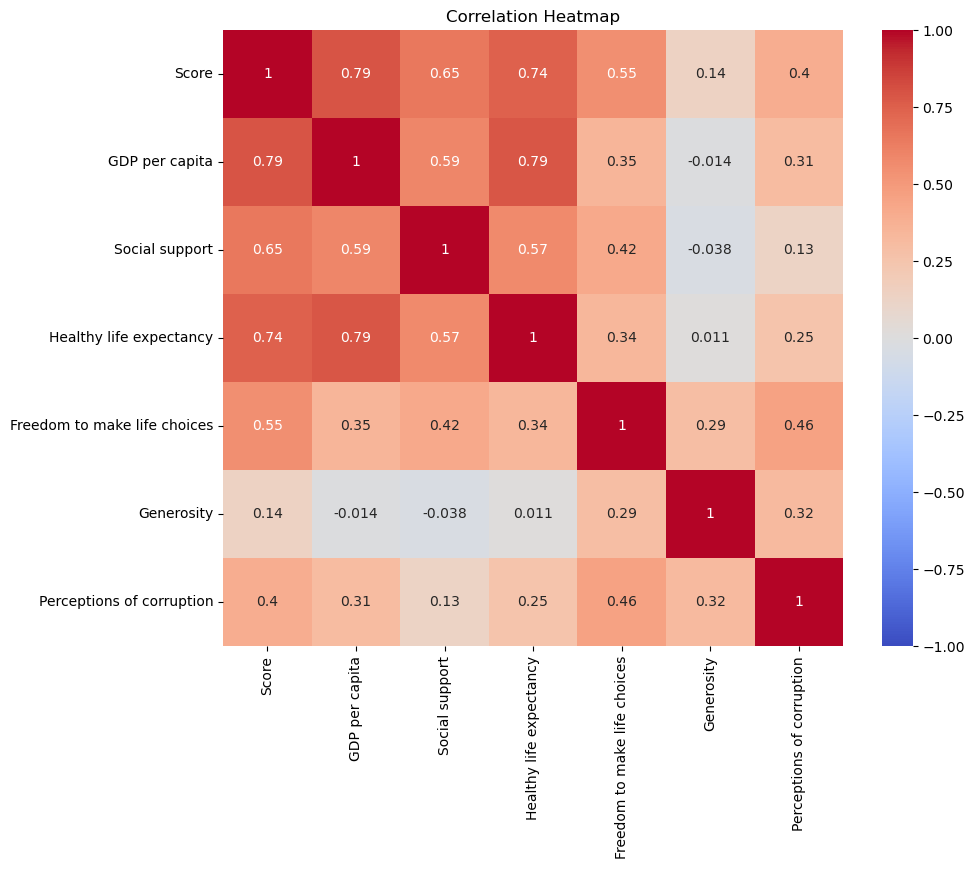

In [18]:
variables = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
             'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Compute correlation matrix
correlation_matrix = happiness[variables].corr()

# Display correlation coefficients
print("Correlation Coefficients:")
print(correlation_matrix)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# Outlier Analysis

## Identify Outliers using IQR method
def identify_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

## Identify outliers in 'Score'
score_outliers = identify_outliers(happiness, 'Score')

print("Outliers in Happiness Score:")
print(score_outliers[['Country', 'Year', 'Score']])

'''This suggests that the scores are relatively consistent and do not contain significant deviations from the overall distribution.'''

Outliers in Happiness Score:
Empty DataFrame
Columns: [Country, Year, Score]
Index: []


'This suggests that the scores are relatively consistent and do not contain significant deviations from the overall distribution.'

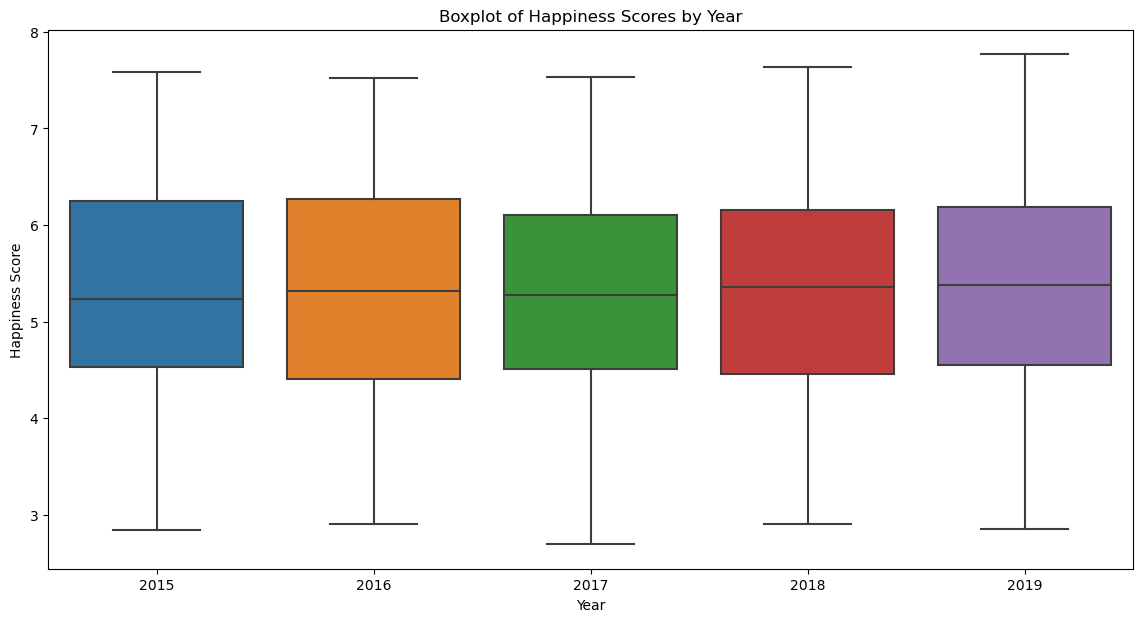

In [20]:
# Visualize Outliers
plt.figure(figsize=(14, 7))

# Boxplot to visualize outliers in 'Score'
sns.boxplot(x='Year', y='Score', data=happiness)
plt.title('Boxplot of Happiness Scores by Year')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.show()

In [21]:
# Splitting into train and test data

selected_columns = ['Score', 'GDP per capita', 'Social support', 
                    'Healthy life expectancy', 'Freedom to make life choices', 
                    'Generosity', 'Perceptions of corruption']

# Create a new DataFrame with only the selected columns
happiness_model = happiness.loc[:, selected_columns]


In [22]:
x = happiness_model.drop(['Score'], axis=1) #to get the independent variables
y = happiness_model['Score'] # to get the dependent variable

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
# Linear regression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = lm.predict(X_test)

In [25]:
result_lm = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
result_lm['Difference'] = y_test - y_pred
result_lm.head()

,Actual,Predicted,Difference
126,4.350,4.509817,-0.159817
118,4.441,5.238281,-0.797281
74,5.472,4.597529,0.874471
20,6.825,6.776050,0.048950
17,6.886,6.651399,0.234601


In [26]:
print('Estimated intercept is', lm.intercept_)

Estimated intercept is 2.1538320844156673


In [27]:
print('Coefficient of the model is', lm.coef_)

Coefficient of the model is [1.06516984 0.67421662 1.07025783 1.55283011 0.52401315 1.03954821]


In [28]:
coef = zip(x.columns, lm.coef_)
coef_df = pd.DataFrame(list(zip(x.columns, lm.coef_)), columns=['Features', 'Coefficients'])
coef_df

,Features,Coefficients
0,GDP per capita,1.065170
1,Social support,0.674217
2,Healthy life expectancy,1.070258
3,Freedom to make life choices,1.552830
4,Generosity,0.524013
5,Perceptions of corruption,1.039548


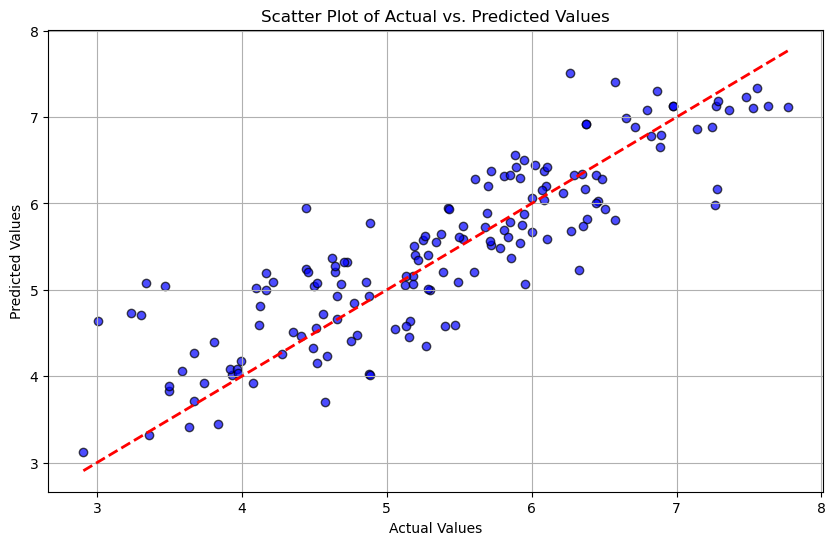

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.grid(True)
plt.show()

In [30]:

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
#variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(X_test, y_test))

Mean Absolute Error: 0.4306660024268799
Mean Squared Error: 0.3152358654550645
Root Mean Squared Error: 0.5614586943445301
Variance score: 0.75
